# Study on Weather in Palo Alto during 2014

Import the necessary libraries:

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime

%matplotlib inline

Load and inspect the data:

In [49]:
data = pd.read_csv('613584.csv', parse_dates=True, index_col=5)

In [50]:
data.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,MDPR,Measurement Flag,Quality Flag,Source Flag,Time of Observation,...,TMIN,Measurement Flag.4,Quality Flag.4,Source Flag.4,Time of Observation.4,TOBS,Measurement Flag.5,Quality Flag.5,Source Flag.5,Time of Observation.5
DATE,,,,,,,,,,,,,,,,,,,,,
2015-01-19,GHCND:US1CASC0017,PALO ALTO 1.2 NE CA US,9.8,37.4516,-122.1486,-9999,,,,9999,...,-9999,,,,9999,-9999,,,,9999
2015-02-07,GHCND:US1CASC0017,PALO ALTO 1.2 NE CA US,9.8,37.4516,-122.1486,-9999,,,,9999,...,-9999,,,,9999,-9999,,,,9999
2015-02-08,GHCND:US1CASC0017,PALO ALTO 1.2 NE CA US,9.8,37.4516,-122.1486,-9999,,,,9999,...,-9999,,,,9999,-9999,,,,9999
2015-02-09,GHCND:US1CASC0017,PALO ALTO 1.2 NE CA US,9.8,37.4516,-122.1486,-9999,,,,9999,...,-9999,,,,9999,-9999,,,,9999
2015-03-11,GHCND:US1CASC0017,PALO ALTO 1.2 NE CA US,9.8,37.4516,-122.1486,-9999,,,,9999,...,-9999,,,,9999,-9999,,,,9999


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227 entries, 2015-01-19 to 2015-09-26
Data columns (total 35 columns):
STATION                  227 non-null object
STATION_NAME             227 non-null object
ELEVATION                227 non-null float64
LATITUDE                 227 non-null float64
LONGITUDE                227 non-null float64
MDPR                     227 non-null int64
Measurement Flag         227 non-null object
Quality Flag             227 non-null object
Source Flag              227 non-null object
Time of Observation      227 non-null int64
DAPR                     227 non-null int64
Measurement Flag.1       227 non-null object
Quality Flag.1           227 non-null object
Source Flag.1            227 non-null object
Time of Observation.1    227 non-null int64
PRCP                     227 non-null int64
Measurement Flag.2       227 non-null object
Quality Flag.2           227 non-null object
Source Flag.2            227 non-null object
Time of Observation.2  

In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ELEVATION,227,7.725991,0.512311,7.6000,7.6000,7.6000,7.6000,9.8000
LATITUDE,227,37.444058,0.001863,37.4436,37.4436,37.4436,37.4436,37.4516
LONGITUDE,227,-122.140681,0.001956,-122.1486,-122.1402,-122.1402,-122.1402,-122.1402
MDPR,227,-9866.687225,1145.841571,-9999.0000,-9999.0000,-9999.0000,-9999.0000,38.0000
Time of Observation,227,9999.000000,0.000000,9999.0000,9999.0000,9999.0000,9999.0000,9999.0000
DAPR,227,-9866.819383,1144.695213,-9999.0000,-9999.0000,-9999.0000,-9999.0000,4.0000
Time of Observation.1,227,9999.000000,0.000000,9999.0000,9999.0000,9999.0000,9999.0000,9999.0000
PRCP,227,-254.440529,1609.861581,-9999.0000,0.0000,0.0000,0.0000,401.0000
Time of Observation.2,227,1569.960352,2553.182968,800.0000,800.0000,800.0000,800.0000,9999.0000
TMAX,227,-442.026432,2548.262075,-9999.0000,189.0000,228.0000,267.0000,367.0000


### Clean the data:

In [53]:
data = data.replace([-9999, 9999], [np.nan, np.nan])

In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ELEVATION,227,7.725991,0.512311,7.6000,7.6000,7.6000,7.6000,9.8000
LATITUDE,227,37.444058,0.001863,37.4436,37.4436,37.4436,37.4436,37.4516
LONGITUDE,227,-122.140681,0.001956,-122.1486,-122.1402,-122.1402,-122.1402,-122.1402
MDPR,3,12.666667,21.939310,0.0000,0.0000,0.0000,19.0000,38.0000
Time of Observation,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAPR,3,2.666667,1.154701,2.0000,2.0000,2.0000,3.0000,4.0000
Time of Observation.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRCP,221,10.117647,48.016140,0.0000,0.0000,0.0000,0.0000,401.0000
Time of Observation.2,208,800.000000,0.000000,800.0000,800.0000,800.0000,800.0000,800.0000
TMAX,212,234.174528,52.873476,100.0000,198.5000,233.0000,272.0000,367.0000


### Temperatures in Palo Alto

In [91]:
data['TMEAN'] = pd.DataFrame(data, columns=['TMIN','TMAX']).mean(axis=1)
pd.DataFrame(data, columns=['TMIN','TMAX','TMEAN']).describe().T

,count,mean,std,min,25%,50%,75%,max
TMIN,212,98.339623,43.340028,-11.0,67.0,100,129.25,172.0
TMAX,212,234.174528,52.873476,100.0,198.5,233,272.00,367.0
TMEAN,212,166.257075,44.853460,44.5,133.5,167,203.00,261.5


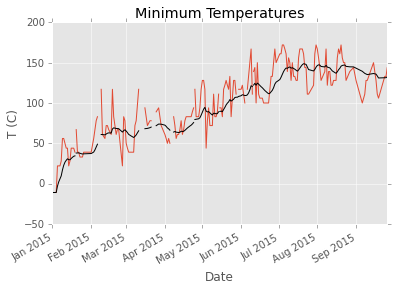

In [92]:
data.TMIN.plot().plot(style='k--')
ax = pd.ewma(data.TMIN, 10).plot(x='Date',y='T (C)',style='k', title='Minimum Temperatures')
ax.set_xlabel('Date')
ax.set_ylabel('T (C)')

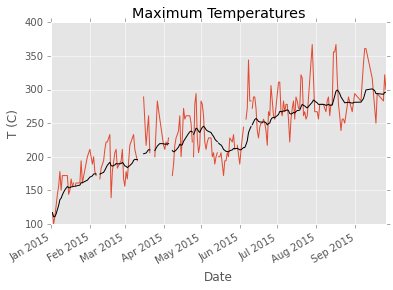

In [93]:
data.TMAX.plot().plot(style='k--')
ax = pd.ewma(data.TMAX, 10).plot(x='Date',y='T (C)',style='k', title='Maximum Temperatures')
ax.set_xlabel('Date')
ax.set_ylabel('T (C)')

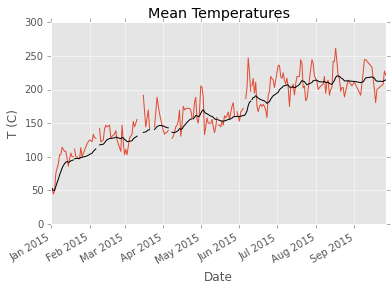

In [94]:
data.TMEAN.plot().plot(style='k--')
ax = pd.ewma(data.TMEAN, 10).plot(x='Date',y='T (C)',style='k', title='Mean Temperatures')
ax.set_xlabel('Date')
ax.set_ylabel('T (C)')

### Results:

The plots show a general increase in temperature for the whole year of 2014.